## ML Zoom Camp 2022
### Week 3 assignment

The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column `card`). 
### Dataset

In this homework, we will use the California Housing Prices data from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../data/housing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`,
* `'ocean_proximity'`,




In [3]:
features = [
'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value',
'ocean_proximity'

]

### Data preparation

* Select only the features from above and fill in the missing values with 0.
* Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe. 
* Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe. 
* Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe. 

In [4]:
df['rooms_per_household'] = df.total_rooms.div(df.households)
df['bedrooms_per_room'] = df.total_bedrooms.div(df.total_rooms)
df['population_per_household'] = df.population.div(df.households)

# round(df.rooms_per_household)

### Question 1

What is the most frequent observation (mode) for the column `ocean_proximity`?

Options:
* `NEAR BAY`
* `<1H OCEAN`
* `INLAND`
* `NEAR OCEAN`

In [5]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

The value `<1H OCEAN` is the most frequent. 

### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Options:
* `total_bedrooms` and `households`
* `total_bedrooms` and `total_rooms`
* `population` and `households`
* `population_per_household` and `total_rooms`


In [6]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.092657,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.113815,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.136089,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.133798,-0.187900,-0.024581
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.001538,0.084238,-0.028355
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.035319,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.080598,0.065087,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.326895,-0.615661,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.255880,-0.023737
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.001538,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.416952,-0.004852


Not so easy to see in table form, let's color it.

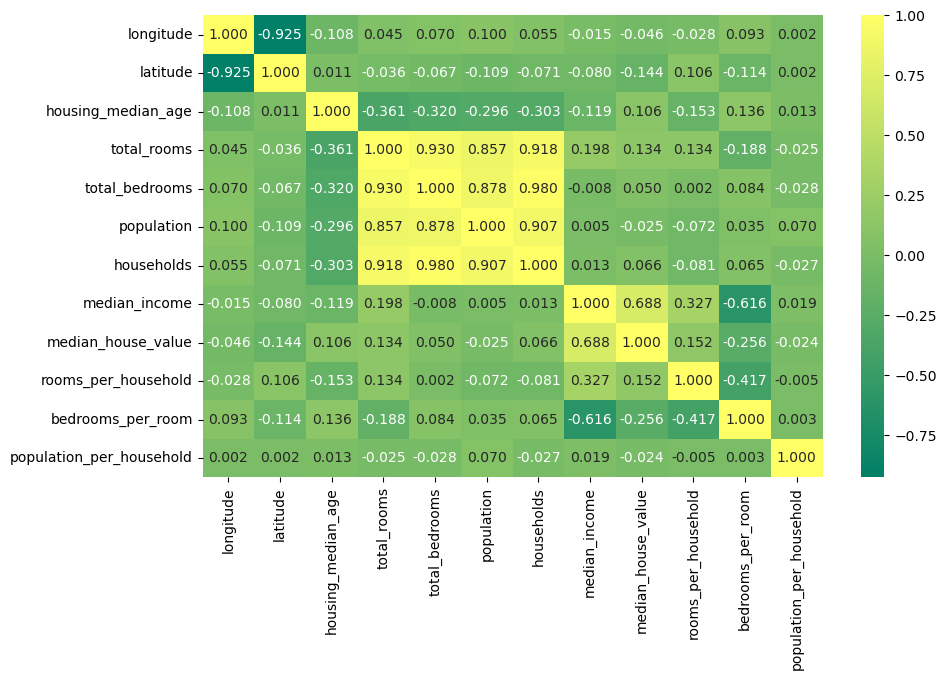

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap="summer", annot=True, fmt='.3f');

We see several high corrolation columns, of them `total_bedrooms` and `households` have the highest.

### Make `median_house_value` binary

* We need to turn the `median_house_value` variable from numeric into binary.
* Let's create a variable `above_average` which is `1` if the `median_house_value` is above its mean value and `0` otherwise.

In [8]:
mean_mhv = df.median_house_value.mean()
above_average = (df.median_house_value > mean_mhv)*1
above_average.value_counts()

0    12255
1     8385
Name: median_house_value, dtype: int64


### Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value (`median_house_value`) is not in your dataframe.


In [9]:
SEED = 42

from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

assert len(df) == (len(df_train) + len(df_val) + len(df_test))

len(df_train), len(df_val), len(df_test)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

assert 'median_house_value' not in df_train.columns
assert 'median_house_value' not in df_val.columns
assert 'median_house_value' not in df_test.columns


### Question 3

* Calculate the *mutual information score* between `above_average` and `ocean_proximity` . Use the training set only.
* Round it to 2 decimals using `round(score, 2)`
* What is their *mutual information score*?


Options:
- 0.26
- 0
- 0.10
- 0.16


In [10]:
from sklearn.metrics import mutual_info_score

In [11]:
above_average_train = (y_train > y_train.mean())*1
mi_neighbourhood_group = mutual_info_score(above_average_train, df_train.ocean_proximity)
print(round(mi_neighbourhood_group, 3))

0.101


### Question 4

* Now let's train a logistic regression
* Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:
- 0.60
- 0.72
- 0.84
- 0.95

In [12]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [13]:
def make_price_binary(price, value):
    func = lambda x: 1 if x >= value else 0
    price_binary = np.array(list(map(func, price)))
    return price_binary

In [14]:
above_average_train = make_price_binary(y_train, mean_mhv)
above_average_val = make_price_binary(y_val, mean_mhv)
above_average_test = make_price_binary(y_test, mean_mhv)

In [15]:
features.remove('median_house_value')

In [16]:
train_dict = df_train[features].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [17]:
dv.get_feature_names_out()

array(['households', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity=<1H OCEAN',
       'ocean_proximity=INLAND', 'ocean_proximity=ISLAND',
       'ocean_proximity=NEAR BAY', 'ocean_proximity=NEAR OCEAN',
       'population', 'total_bedrooms', 'total_rooms'], dtype=object)

In [18]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=SEED)

In [19]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [20]:

val_dict = df_val[features].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

accuracy = np.round(accuracy_score(y_val, y_pred),3)
print(accuracy)

0.052


In [21]:
y_pred = model.predict_proba(X_val)[:, 1]

decision = (y_pred >= 0.5)

df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = decision.astype(int)
df_pred['actual'] = above_average_val

df_pred['correct'] = df_pred.prediction == df_pred.actual

original_score = df_pred.correct.mean()
print(f'Accuracy = {round(original_score, 2)}')

Accuracy = 0.59



### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * `total_rooms`
   * `total_bedrooms` 
   * `population`
   * `households`

> **Note**: the difference doesn't have to be positive



In [28]:
scores = pd.DataFrame()
for feature in features:
    df_train_cut = df_train.copy()
    df_val_cut = df_val.copy()
    
    df_train_cut = df_train_cut.drop(columns={feature})
    df_val_cut = df_val_cut.drop(columns={feature})
    
    dv_cut = DictVectorizer(sparse=False)
    train_dict_cut = df_train_cut.to_dict(orient='records')
    X_train_cut = dv_cut.fit_transform(train_dict_cut)
    val_dict_cut = df_val_cut.to_dict(orient='records')
    X_val_cut = dv_cut.transform(val_dict_cut)
    
    model = LogisticRegression(solver='lbfgs', C=1.0, max_iter=1400, random_state=SEED)
    model.fit(X_train_cut, above_average_train)
    
    y_pred = model.predict_proba(X_val_cut)[:, 1] 
    prediction = (y_pred >= 0.5).astype(int)
    correct = (prediction == above_average_val)
    score = correct.mean()
    scores = scores.append({
        'eliminated_feature': feature,
        'accuracy': score, 
        'difference': abs(original_score - score)
    }, ignore_index=True)

C:\Users\OWNER\AppData\Local\Temp\ipykernel_4964\4268590085.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append({
C:\Users\OWNER\AppData\Local\Temp\ipykernel_4964\4268590085.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append({
C:\Users\OWNER\AppData\Local\Temp\ipykernel_4964\4268590085.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append({
C:\Users\OWNER\AppData\Local\Temp\ipykernel_4964\4268590085.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append({
C:\Users\OWNER\AppData\Local\Temp\ipykernel_4964\4268590085.py:22: FutureWarning: The frame.

In [29]:
scores

,eliminated_feature,accuracy,difference
0,latitude,0.832364,0.240552
1,longitude,0.830911,0.239099
2,housing_median_age,0.830911,0.239099
3,total_rooms,0.837694,0.245882
4,total_bedrooms,0.835029,0.243217
5,population,0.826550,0.234738
6,households,0.834545,0.242733
7,median_income,0.784641,0.192829
8,ocean_proximity,0.819767,0.227955


In [30]:
min_diff = scores.difference.min()
scores[scores.difference == min_diff]

,eliminated_feature,accuracy,difference
7,median_income,0.784641,0.192829


### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'median_house_value'`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (`model = Ridge(alpha=a, solver="sag", random_state=42)`) on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.

Options:
- 0
- 0.01
- 0.1
- 1
- 10




In [31]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [32]:

y_train = np.log1p(y_train)
y_val = np.log1p(y_val)

y_train.shape, y_val.shape

((12384,), (4128,))

In [33]:
scores = {}
for alpha in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = mean_squared_error(y_val, y_pred, squared=False)
    scores[alpha] = round(score, 3)
    print(f'alpha = {alpha}:\t RMSE = {score}')

alpha = 0:	 RMSE = 0.3266260447094901
alpha = 0.01:	 RMSE = 0.3266239402793648
alpha = 0.1:	 RMSE = 0.32660643208575035
alpha = 1:	 RMSE = 0.3265177511004141
alpha = 10:	 RMSE = 0.3265373164957482


c:\ProgramData\Anaconda3\envs\ZoomMLCamp1\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.21172e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [34]:
scores

{0: 0.327, 0.01: 0.327, 0.1: 0.327, 1: 0.327, 10: 0.327}

In [35]:
print(f'The smallest `alpha` is {min(scores, key=scores.get)}.')

The smallest `alpha` is 0.
